# Regression of Used Car Prices

## Import primary library in python

In [1]:
import os  # Operating system interactions
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # High-level data visualization based on matplotlib

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold, RandomizedSearchCV  # Model selection and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder  # Preprocessing steps
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.compose import ColumnTransformer  # Applying transformers to specific columns
from sklearn.pipeline import Pipeline  # Pipeline assembly
from sklearn.decomposition import PCA  # Dimensionality reduction

# Set display option for pandas
pd.set_option('display.max_rows', None)  # Display all rows in pandas DataFrame

# === Regression Models ===
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# === Classification Models ===
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# === Evaluation Metrics ===
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For classification
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error  # For regression

# Ignore all warnings
import warnings  # Suppress warnings
warnings.filterwarnings('ignore')

#Regular expression operations
import re

## 1. Import dataset:

In [2]:
# Read the CSV files into pandas DataFrames
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Make a copy
train_df = train.copy(deep=False)
test_df = test.copy(deep=False)

In [4]:
def null_and_percent(dataframe):
    totalNull = dataframe.isnull().sum()
    totalNull_percentage = dataframe.isnull().sum()/dataframe.shape[0]*100
    # Combine the count and percentage into a single DataFrame
    nullAndPercentage = pd.DataFrame({'Count': totalNull, 'Percentage (%)': totalNull_percentage})

    # Display the result
    return nullAndPercentage

In [5]:
def plot_missing_data(dataset, title):
    # Set the color palette to white for non-NaN and red for NaN
    cmap = sns.color_palette(["#D3D3D3", "#fdf330"])
    # Create the plot
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)
    # Generate heatmap, missing values will appear in red, non-missing in white
    sns.heatmap(dataset.isnull(), cmap=cmap, cbar=False)
    plt.show()

In [6]:
from scipy import stats

# Function to plot scatter plot between a feature and the Sale Price using Seaborn
def scatter_plot(a, dataframe):
    # Scatter plot with Seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=a, 
        y='price', 
        data=dataframe, 
        edgecolor='red',  # Customize marker border color
        linewidth=1
    )
    
    # Customize layout
    plt.title(f"Scatter Plot of {a} and Price", fontsize=15)
    plt.xlabel(a, fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.grid(True)
    plt.ticklabel_format(style='plain')
    plt.show()
    
    # Z-score calculation and output
    print(f"Z-Score of {a}")
    print(" ")
    z_scores = stats.zscore(dataframe[a].dropna())  # Drop missing values for Z-score calculation
    top_5 = pd.Series(z_scores, index=dataframe.index).sort_values().head(5)
    bottom_5 = pd.Series(z_scores, index=dataframe.index).sort_values().tail(5)

    # Combine them into a DataFrame
    combined = pd.DataFrame({
        'Top 5 Z-Scores': top_5,
        'Bottom 5 Z-Scores': bottom_5
    })
    print(combined)

In [7]:
def count_and_percent(datframe, column):
    brand_counts_def = datframe[column].value_counts(dropna=False).sort_index()
    brand_percentage_def = datframe[column].value_counts() /datframe.shape[0]*100
    # Combine the count and percentage into a single DataFrame
    brand_summary_def = pd.DataFrame({'Count': brand_counts_def, 'Percentage (%)': brand_percentage_def})

    # Display the result
    return brand_summary_def

In [8]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

              Count  Percentage (%)
id                0        0.000000
brand             0        0.000000
model             0        0.000000
model_year        0        0.000000
milage            0        0.000000
fuel_type      5083        2.696080
engine            0        0.000000
transmission      0        0.000000
ext_col           0        0.000000
int_col           0        0.000000
accident       2452        1.300568
clean_title   21419       11.360876
price             0        0.000000
--------------------------------------
              Count  Percentage (%)
id                0        0.000000
brand             0        0.000000
model             0        0.000000
model_year        0        0.000000
milage            0        0.000000
fuel_type      3383        2.691543
engine            0        0.000000
transmission      0        0.000000
ext_col           0        0.000000
int_col           0        0.000000
accident       1632        1.298433
clean_title   14239      

In [9]:
print('**************** Train *******************')
print(count_and_percent(train_df,'clean_title'))
print("")
print('***************** Test ******************')
print(count_and_percent(test_df,'clean_title'))

**************** Train *******************
              Count  Percentage (%)
clean_title                        
Yes          167114       88.639124
NaN           21419             NaN

***************** Test ******************
              Count  Percentage (%)
clean_title                        
Yes          111451       88.671334
NaN           14239             NaN


In [10]:
train_df['clean_title'].fillna('No', inplace=True)
test_df['clean_title'].fillna('No', inplace=True)

In [11]:
print('**************** Train *******************')
print(count_and_percent(train_df,'clean_title'))
print("")
print('***************** Test ******************')
print(count_and_percent(test_df,'clean_title'))

**************** Train *******************
              Count  Percentage (%)
clean_title                        
No            21419       11.360876
Yes          167114       88.639124

***************** Test ******************
              Count  Percentage (%)
clean_title                        
No            14239       11.328666
Yes          111451       88.671334


In [12]:
print(count_and_percent(train_df,'fuel_type'))
print('***************************************************************')
print(count_and_percent(test_df,'fuel_type'))

                 Count  Percentage (%)
fuel_type                             
Diesel            3955        2.097776
E85 Flex Fuel     5406        2.867403
Gasoline        165940       88.016422
Hybrid            6832        3.623769
Plug-In Hybrid     521        0.276344
not supported       15        0.007956
–                  781        0.414251
NaN               5083             NaN
***************************************************************
                 Count  Percentage (%)
fuel_type                             
Diesel            2686        2.137004
E85 Flex Fuel     3523        2.802928
Gasoline        110533       87.940966
Hybrid            4676        3.720264
Plug-In Hybrid     337        0.268120
not supported       14        0.011139
–                  538        0.428037
NaN               3383             NaN


In [13]:
train_df['fuel_type'].replace('–', np.nan, inplace=True)
test_df['fuel_type'].replace('–', np.nan, inplace=True)

In [14]:
print(count_and_percent(train_df,'fuel_type'))
print('***************************************************************')
print(count_and_percent(test_df,'fuel_type'))

                 Count  Percentage (%)
fuel_type                             
Diesel            3955        2.097776
E85 Flex Fuel     5406        2.867403
Gasoline        165940       88.016422
Hybrid            6832        3.623769
Plug-In Hybrid     521        0.276344
not supported       15        0.007956
NaN               5864             NaN
***************************************************************
                 Count  Percentage (%)
fuel_type                             
Diesel            2686        2.137004
E85 Flex Fuel     3523        2.802928
Gasoline        110533       87.940966
Hybrid            4676        3.720264
Plug-In Hybrid     337        0.268120
not supported       14        0.011139
NaN               3921             NaN


In [15]:
print(count_and_percent(train_df,'engine'))
print('***************************************************************')
print(count_and_percent(test_df,'engine'))

                                                    Count  Percentage (%)
engine                                                                   
1.2L I3 12V GDI DOHC Turbo                             25        0.013260
1.3L I3 12V GDI DOHC Turbo                             60        0.031825
1.3L I3 12V MPFI DOHC Turbo                             8        0.004243
1.4L I4 16V GDI DOHC Turbo                             11        0.005835
1.5 Liter Turbo                                         7        0.003713
1.5L I3 12V GDI DOHC Turbo                             37        0.019625
1.5L I3 12V PDI DOHC Turbo                            126        0.066832
1.5L I4 16V GDI DOHC Turbo                             78        0.041372
1.6L I4 16V GDI DOHC                                    4        0.002122
1.6L I4 16V GDI DOHC Hybrid                            11        0.005835
1.6L I4 16V GDI DOHC Turbo                             79        0.041902
1.6L I4 16V GDI DOHC Turbo Hybrid     

In [16]:
train_df['engine'].replace('–', np.nan, inplace=True)
test_df['engine'].replace('–', np.nan, inplace=True)

In [17]:
train_df['engine'].fillna('unknown', inplace=True)
test_df['engine'].fillna('unknown', inplace=True)

In [18]:
train_df['engine'].isnull().sum()

0

In [19]:
test_df['engine'].isnull().sum()

0

In [20]:
# Get value counts for the 'accident' column, including NaN values
print(train_df['accident'].value_counts(dropna=False))
print(30*'*')
print(test_df['accident'].value_counts(dropna=False))

accident
None reported                             144514
At least 1 accident or damage reported     41567
NaN                                         2452
Name: count, dtype: int64
******************************
accident
None reported                             96263
At least 1 accident or damage reported    27795
NaN                                        1632
Name: count, dtype: int64


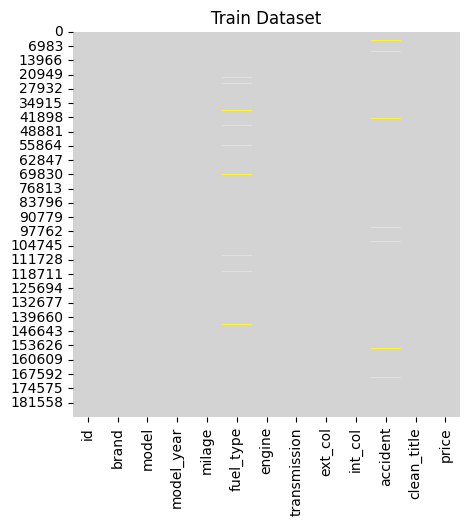

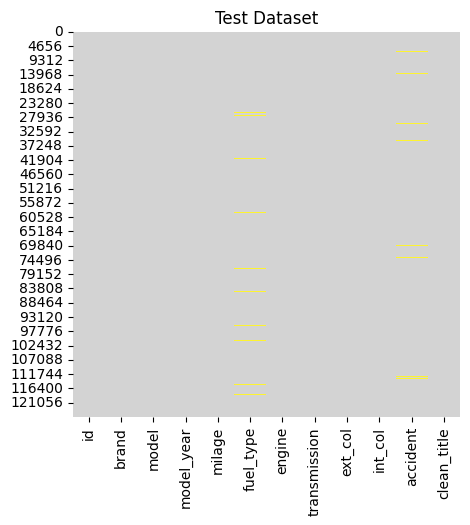

In [21]:
plot_missing_data(train_df, "Train Dataset") 
plot_missing_data(test_df, "Test Dataset")

In [22]:
train_df['accident'] = train_df['accident'].fillna(train_df['accident'].mode()[0])
test_df['accident'] = test_df['accident'].fillna(test_df['accident'].mode()[0])

In [23]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

              Count  Percentage (%)
id                0        0.000000
brand             0        0.000000
model             0        0.000000
model_year        0        0.000000
milage            0        0.000000
fuel_type      5864        3.110331
engine            0        0.000000
transmission      0        0.000000
ext_col           0        0.000000
int_col           0        0.000000
accident          0        0.000000
clean_title       0        0.000000
price             0        0.000000
--------------------------------------
              Count  Percentage (%)
id                0         0.00000
brand             0         0.00000
model             0         0.00000
model_year        0         0.00000
milage            0         0.00000
fuel_type      3921         3.11958
engine            0         0.00000
transmission      0         0.00000
ext_col           0         0.00000
int_col           0         0.00000
accident          0         0.00000
clean_title       0      

In [24]:
train_df.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900


In [25]:
# HP ভ্যালুগুলো এক্সট্র্যাক্ট করা
train_df['engile_hp'] = train_df['engine'].str.extract(r'(\d+\.?\d*)HP')
test_df['engile_hp'] = test_df['engine'].str.extract(r'(\d+\.?\d*)HP')

In [26]:
print(count_and_percent(train_df,'engile_hp'))
print(20*"*")
print(count_and_percent(test_df,'engile_hp'))

           Count  Percentage (%)
engile_hp                       
101.0         20        0.010608
1020.0        38        0.020156
104.0         16        0.008487
106.0         15        0.007956
107.0         24        0.012730
109.0         23        0.012199
111.0          1        0.000530
115.0         61        0.032355
118.0        151        0.080092
120.0        115        0.060997
121.0          3        0.001591
122.0         94        0.049859
126.0         13        0.006895
130.0         59        0.031294
131.0         26        0.013791
132.0        200        0.106082
133.0         32        0.016973
134.0        132        0.070014
136.0        131        0.069484
137.0          8        0.004243
138.0        213        0.112978
139.0          3        0.001591
140.0        581        0.308169
141.0          2        0.001061
142.0         86        0.045615
143.0         69        0.036598
145.0          8        0.004243
146.0         29        0.015382
147.0     

In [27]:
print(train_df[train_df['engile_hp'].isna()].shape)
print('*************************************')
print(test_df[test_df['engile_hp'].isna()].shape)

(33259, 14)
*************************************
(22181, 13)


In [28]:
def extract_fuel_type(description):
    if 'Electric' in description:
        return 'Electric'
    elif 'Gasoline' in description:
        return 'Gasoline'
    elif 'Diesel' in description:
        return 'Diesel'
    elif 'Flex Fuel' in description:
        return 'Flex Fuel'
    elif 'Hybrid' in description:
        return 'Hybrid'
    else:
        return np.nan

In [29]:
train_df['fuelTypeEngine'] = train_df['engine'].apply(extract_fuel_type)
test_df['fuelTypeEngine'] = test_df['engine'].apply(extract_fuel_type)

In [30]:
train_df['fuel_type'].fillna(train_df['fuelTypeEngine'], inplace=True)
test_df['fuel_type'].fillna(test_df['fuelTypeEngine'], inplace=True)

In [31]:
train_df = train_df.drop('fuelTypeEngine', axis=1)
test_df = test_df.drop('fuelTypeEngine', axis=1)

In [32]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

              Count  Percentage (%)
id                0        0.000000
brand             0        0.000000
model             0        0.000000
model_year        0        0.000000
milage            0        0.000000
fuel_type       951        0.504421
engine            0        0.000000
transmission      0        0.000000
ext_col           0        0.000000
int_col           0        0.000000
accident          0        0.000000
clean_title       0        0.000000
price             0        0.000000
engile_hp     33259       17.640943
--------------------------------------
              Count  Percentage (%)
id                0        0.000000
brand             0        0.000000
model             0        0.000000
model_year        0        0.000000
milage            0        0.000000
fuel_type       637        0.506802
engine            0        0.000000
transmission      0        0.000000
ext_col           0        0.000000
int_col           0        0.000000
accident          0      

In [33]:
def extract_cylinder_type(description):
    match = re.search(r'\b(\d+)\s*Cylinder\b', description)
    if match:
        return match.group(1)
    
    if 'V6' in description:
        return 'V6'
    
    if 'V8' in description:
        return 'V8'
    
    if 'I4' in description:
        return 'I4'
    
    return np.nan

In [34]:
# Findout Cylinder Type
train_df['cylinder_type'] = train_df['engine'].apply(extract_cylinder_type)
test_df['cylinder_type'] = test_df['engine'].apply(extract_cylinder_type)

In [35]:
def extract_liter_value_lite(description):
    # `Liter` এর আগে স্পেস সহ সংখ্যাটি বের করতে regex ব্যবহার করো
    match = re.search(r'(\d+\.\d+|\d+)\s*L', description)
    if match:
        return float(match.group(1))
    # যদি `Liter` শব্দ থাকে এবং `L` এর আগে স্পেস থাকে
    match_liter = re.search(r'(\d+)\s*Liter', description)
    if match_liter:
        return float(match_liter.group(1))
    return np.nan

In [36]:
# L সহ ভ্যালু বের করো
train_df['liter_liter'] = train_df['engine'].apply(extract_liter_value_lite)
test_df['liter_liter'] = test_df['engine'].apply(extract_liter_value_lite)

In [37]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type        951        0.504421
engine             0        0.000000
transmission       0        0.000000
ext_col            0        0.000000
int_col            0        0.000000
accident           0        0.000000
clean_title        0        0.000000
price              0        0.000000
engile_hp      33259       17.640943
cylinder_type  16553        8.779895
liter_liter     6698        3.552694
--------------------------------------
               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type        637        0.506802
engine             0        0.000000
transmission       0        0.000000

In [38]:
train_df['fuel_type'] = train_df.groupby(['brand', 'model','engine'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
test_df['fuel_type'] = test_df.groupby(['brand', 'model','engine',])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['fuel_type'].isnull().sum())
print(test_df['fuel_type'].isnull().sum())

316
264


In [39]:
train_df['fuel_type'] = train_df.groupby(['model','engine'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
test_df['fuel_type'] = test_df.groupby(['model','engine'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['fuel_type'].isnull().sum())
print(test_df['fuel_type'].isnull().sum())

301
261


In [40]:
train_df['fuel_type'] = train_df.groupby(['brand','engine'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
test_df['fuel_type'] = test_df.groupby(['brand','engine'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['fuel_type'].isnull().sum())
print(test_df['fuel_type'].isnull().sum())

45
76


In [41]:
train_df['fuel_type'] = train_df.groupby(['engine'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
test_df['fuel_type'] = test_df.groupby(['engine'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['fuel_type'].isnull().sum())
print(test_df['fuel_type'].isnull().sum())

8
1


In [42]:
train_df['fuel_type'] = train_df.groupby(['brand'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
test_df['fuel_type'] = test_df.groupby(['brand'])['fuel_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['fuel_type'].isnull().sum())
print(test_df['fuel_type'].isnull().sum())

0
0


In [43]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000
transmission       0        0.000000
ext_col            0        0.000000
int_col            0        0.000000
accident           0        0.000000
clean_title        0        0.000000
price              0        0.000000
engile_hp      33259       17.640943
cylinder_type  16553        8.779895
liter_liter     6698        3.552694
--------------------------------------
               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000
transmission       0        0.000000

In [44]:
train_df['engile_hp'] = train_df['engile_hp'].astype('float')  
test_df['engile_hp'] = test_df['engile_hp'].astype('float')

In [45]:
# Function to extract speed and gear type
def extract_speed_and_type(transmission):
    # Extract speed using regex
    speed_match = re.search(r'(\d+)-Speed', transmission, re.IGNORECASE)
    speed = speed_match.group(1) if speed_match else np.nan
    
    # Determine gear type
    if 'A/T' in transmission or 'Automatic' in transmission:
        gear_type = 'Automatic'
    elif 'M/T' in transmission or 'Manual' in transmission:
        gear_type = 'Manual'
    else:
        gear_type = np.nan
    
    return speed, gear_type

In [46]:
# Apply the function to the 'transmission' column and create two new columns 'SPEED' and 'Gear Type'
train_df[['speed', 'gear_type']] = train_df['transmission'].apply(lambda x: pd.Series(extract_speed_and_type(x)))
test_df[['speed', 'gear_type']] = test_df['transmission'].apply(lambda x: pd.Series(extract_speed_and_type(x)))

In [47]:
train_df.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engile_hp,cylinder_type,liter_liter,speed,gear_type
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,4,1.6,NaN,Automatic
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,8,3.9,NaN,Automatic
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,8,5.3,NaN,Automatic


In [48]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000
transmission       0        0.000000
ext_col            0        0.000000
int_col            0        0.000000
accident           0        0.000000
clean_title        0        0.000000
price              0        0.000000
engile_hp      33259       17.640943
cylinder_type  16553        8.779895
liter_liter     6698        3.552694
speed          84434       44.784733
gear_type      21873       11.601682
--------------------------------------
               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             188533 non-null  int64  
 1   brand          188533 non-null  object 
 2   model          188533 non-null  object 
 3   model_year     188533 non-null  int64  
 4   milage         188533 non-null  int64  
 5   fuel_type      188533 non-null  object 
 6   engine         188533 non-null  object 
 7   transmission   188533 non-null  object 
 8   ext_col        188533 non-null  object 
 9   int_col        188533 non-null  object 
 10  accident       188533 non-null  object 
 11  clean_title    188533 non-null  object 
 12  price          188533 non-null  int64  
 13  engile_hp      155274 non-null  float64
 14  cylinder_type  171980 non-null  object 
 15  liter_liter    181835 non-null  float64
 16  speed          104099 non-null  object 
 17  gear_type      166660 non-nul

In [50]:
train_df['speed'].value_counts(dropna=False)

speed
NaN    84434
6      33221
8      29673
7      13027
10     11248
9       6224
5       5785
4       2594
1       2234
2         93
Name: count, dtype: int64

In [51]:
train_df = train_df.drop('speed', axis=1)
test_df = test_df.drop('speed', axis=1)

In [52]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000
transmission       0        0.000000
ext_col            0        0.000000
int_col            0        0.000000
accident           0        0.000000
clean_title        0        0.000000
price              0        0.000000
engile_hp      33259       17.640943
cylinder_type  16553        8.779895
liter_liter     6698        3.552694
gear_type      21873       11.601682
--------------------------------------
               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000

In [53]:
print(train_df['gear_type'].value_counts(dropna=False))
print(test_df['gear_type'].value_counts(dropna=False))

gear_type
Automatic    150302
NaN           21873
Manual        16358
Name: count, dtype: int64
gear_type
Automatic    100296
NaN           14609
Manual        10785
Name: count, dtype: int64


In [54]:
train_df['gear_type'] = train_df.groupby(['brand', 'model','engine', 'transmission'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['gear_type'].isnull().sum())

test_df['gear_type'] = train_df.groupby(['brand', 'model','engine', 'transmission'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['gear_type'].isnull().sum())

21873
14547


In [55]:
train_df['gear_type'] = train_df.groupby(['brand', 'model','engine'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['gear_type'].isnull().sum())

test_df['gear_type'] = train_df.groupby(['brand', 'model','engine'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['gear_type'].isnull().sum())

1531
1016


In [56]:
train_df['gear_type'] = train_df.groupby(['brand', 'model','transmission'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['gear_type'].isnull().sum())

test_df['gear_type'] = train_df.groupby(['brand', 'model', 'transmission'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['gear_type'].isnull().sum())

478
311


In [57]:
train_df['gear_type'] = train_df.groupby(['model','transmission'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['gear_type'].isnull().sum())

test_df['gear_type'] = train_df.groupby(['model', 'transmission'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['gear_type'].isnull().sum())

282
179


In [58]:
train_df['gear_type'] = train_df.groupby(['brand', 'model'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['gear_type'].isnull().sum())

test_df['gear_type'] = train_df.groupby(['brand', 'model'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['gear_type'].isnull().sum())

34
25


In [59]:
train_df['gear_type'] = train_df.groupby(['brand'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['gear_type'].isnull().sum())

test_df['gear_type'] = train_df.groupby(['brand'])['gear_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['gear_type'].isnull().sum())

0
0


In [60]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000
transmission       0        0.000000
ext_col            0        0.000000
int_col            0        0.000000
accident           0        0.000000
clean_title        0        0.000000
price              0        0.000000
engile_hp      33259       17.640943
cylinder_type  16553        8.779895
liter_liter     6698        3.552694
gear_type          0        0.000000
--------------------------------------
               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             188533 non-null  int64  
 1   brand          188533 non-null  object 
 2   model          188533 non-null  object 
 3   model_year     188533 non-null  int64  
 4   milage         188533 non-null  int64  
 5   fuel_type      188533 non-null  object 
 6   engine         188533 non-null  object 
 7   transmission   188533 non-null  object 
 8   ext_col        188533 non-null  object 
 9   int_col        188533 non-null  object 
 10  accident       188533 non-null  object 
 11  clean_title    188533 non-null  object 
 12  price          188533 non-null  int64  
 13  engile_hp      155274 non-null  float64
 14  cylinder_type  171980 non-null  object 
 15  liter_liter    181835 non-null  float64
 16  gear_type      188533 non-null  object 
dtypes: float64(2), int64(4), obje

In [62]:
train_df['engile_hp'] = train_df.groupby(['brand', 'model','fuel_type','gear_type'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['brand', 'model','fuel_type','gear_type'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

1367
**********************************************************
1613


In [63]:
train_df['engile_hp'] = train_df.groupby(['brand', 'model','fuel_type'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['brand', 'model','fuel_type'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

1181
**********************************************************
1117


In [64]:
train_df['engile_hp'] = train_df.groupby(['brand', 'model','gear_type'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['brand', 'model','gear_type'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

802
**********************************************************
792


In [65]:
train_df['engile_hp'] = train_df.groupby(['brand', 'model'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['brand', 'model'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

801
**********************************************************
783


In [66]:
train_df['engile_hp'] = train_df.groupby(['brand', 'engine'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['brand', 'engine'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

120
**********************************************************
118


In [67]:
train_df['engile_hp'] = train_df.groupby(['model', 'engine'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['model', 'engine'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

55
**********************************************************
70


In [68]:
train_df['engile_hp'] = train_df.groupby(['brand'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['brand'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

7
**********************************************************
3


In [69]:
train_df['engile_hp'] = train_df.groupby(['model'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['model'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

0
**********************************************************
3


In [70]:
train_df['engile_hp'] = train_df.groupby(['transmission'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['engile_hp'].isnull().sum())
print('**********************************************************')
test_df['engile_hp'] = test_df.groupby(['transmission'])['engile_hp'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['engile_hp'].isnull().sum())

0
**********************************************************
0


In [71]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000
transmission       0        0.000000
ext_col            0        0.000000
int_col            0        0.000000
accident           0        0.000000
clean_title        0        0.000000
price              0        0.000000
engile_hp          0        0.000000
cylinder_type  16553        8.779895
liter_liter     6698        3.552694
gear_type          0        0.000000
--------------------------------------
               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000

In [72]:
train_df['liter_liter'] = train_df.groupby(['brand', 'model', 'fuel_type','engile_hp'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['liter_liter'].isnull().sum())

test_df['liter_liter'] = test_df.groupby(['brand', 'model','fuel_type','engile_hp'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['liter_liter'].isnull().sum())

5122
3458


In [73]:
train_df['liter_liter'] = train_df.groupby(['brand', 'model', 'fuel_type'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['liter_liter'].isnull().sum())

test_df['liter_liter'] = test_df.groupby(['brand', 'model','fuel_type'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['liter_liter'].isnull().sum())

4932
3422


In [74]:
train_df['liter_liter'] = train_df.groupby(['brand', 'model'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['liter_liter'].isnull().sum())

test_df['liter_liter'] = test_df.groupby(['brand', 'model'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['liter_liter'].isnull().sum())

1194
1766


In [75]:
train_df['liter_liter'] = train_df.groupby(['model'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['liter_liter'].isnull().sum())

test_df['liter_liter'] = test_df.groupby(['model'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['liter_liter'].isnull().sum())

1080
1721


In [76]:
train_df['liter_liter'] = train_df.groupby(['brand'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['liter_liter'].isnull().sum())

test_df['liter_liter'] = test_df.groupby(['brand'])['liter_liter'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['liter_liter'].isnull().sum())

0
0


In [77]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000
transmission       0        0.000000
ext_col            0        0.000000
int_col            0        0.000000
accident           0        0.000000
clean_title        0        0.000000
price              0        0.000000
engile_hp          0        0.000000
cylinder_type  16553        8.779895
liter_liter        0        0.000000
gear_type          0        0.000000
--------------------------------------
               Count  Percentage (%)
id                 0        0.000000
brand              0        0.000000
model              0        0.000000
model_year         0        0.000000
milage             0        0.000000
fuel_type          0        0.000000
engine             0        0.000000

In [78]:
train_df['cylinder_type'] = train_df.groupby(['brand', 'model', 'fuel_type','engile_hp'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['cylinder_type'].isnull().sum())

test_df['cylinder_type'] = test_df.groupby(['brand', 'model', 'fuel_type','engile_hp'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['cylinder_type'].isnull().sum())

5859
3912


In [79]:
train_df['cylinder_type'] = train_df.groupby(['brand', 'model', 'fuel_type'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['cylinder_type'].isnull().sum())

test_df['cylinder_type'] = test_df.groupby(['brand', 'model', 'fuel_type'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['cylinder_type'].isnull().sum())

5601
3811


In [80]:
train_df['cylinder_type'] = train_df.groupby(['brand', 'model'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['cylinder_type'].isnull().sum())

test_df['cylinder_type'] = test_df.groupby(['brand', 'model'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['cylinder_type'].isnull().sum())

2619
1987


In [81]:
train_df['cylinder_type'] = train_df.groupby(['model'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['cylinder_type'].isnull().sum())

test_df['cylinder_type'] = test_df.groupby(['model'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['cylinder_type'].isnull().sum())

2391
1851


In [82]:
train_df['cylinder_type'] = train_df.groupby(['brand'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['cylinder_type'].isnull().sum())

test_df['cylinder_type'] = test_df.groupby(['brand'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['cylinder_type'].isnull().sum())

0
3


In [83]:
train_df['cylinder_type'] = train_df.groupby(['brand', 'model'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(train_df['cylinder_type'].isnull().sum())

test_df['cylinder_type'] = test_df.groupby(['fuel_type'])['cylinder_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
# ইমপুটেশন করার পরে যদি এখনও NaN থাকে, তাহলে চেক করা
print(test_df['cylinder_type'].isnull().sum())

0
0


In [84]:
print(null_and_percent(train_df))
print('--------------------------------------')
print(null_and_percent(test_df))

               Count  Percentage (%)
id                 0             0.0
brand              0             0.0
model              0             0.0
model_year         0             0.0
milage             0             0.0
fuel_type          0             0.0
engine             0             0.0
transmission       0             0.0
ext_col            0             0.0
int_col            0             0.0
accident           0             0.0
clean_title        0             0.0
price              0             0.0
engile_hp          0             0.0
cylinder_type      0             0.0
liter_liter        0             0.0
gear_type          0             0.0
--------------------------------------
               Count  Percentage (%)
id                 0             0.0
brand              0             0.0
model              0             0.0
model_year         0             0.0
milage             0             0.0
fuel_type          0             0.0
engine             0             0.0

In [85]:
#কলামের নাম পরিবর্তন করা 
train_df =train_df.rename(columns={'engile_hp': 'engine_horse_power', 'liter_liter': 'liter'})
#কলামের নাম পরিবর্তন করা 
test_df =test_df.rename(columns={'engile_hp': 'engine_horse_power', 'liter_liter': 'liter'})

In [86]:
train_df.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_horse_power,cylinder_type,liter,gear_type
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,4,1.6,Automatic
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,8,3.9,Automatic
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,8,5.3,Automatic


In [87]:
import datetime  
current_year = datetime.datetime.now().year +1 
train_df['car_age'] = current_year - train_df['model_year']
test_df['car_age'] = current_year - test_df['model_year']

In [88]:
# All the columns that are not needed are to be dropped ['model_year', 'engine', 'transmission', 'ext_col', 'int_col', 'speed']
#Dropping a Column
train_df=train_df.drop(['model_year', 'engine', 'transmission', 'ext_col', 'int_col'], axis=1)
#Dropping a Column
test_df=test_df.drop(['model_year', 'engine', 'transmission', 'ext_col', 'int_col'], axis=1)

In [89]:
print(train_df.shape)
print(test_df.shape)

(188533, 13)
(125690, 12)


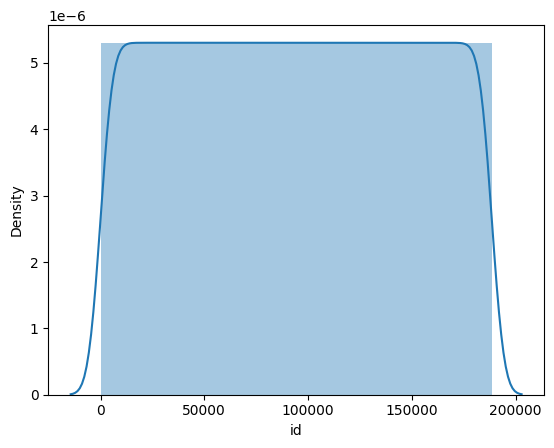

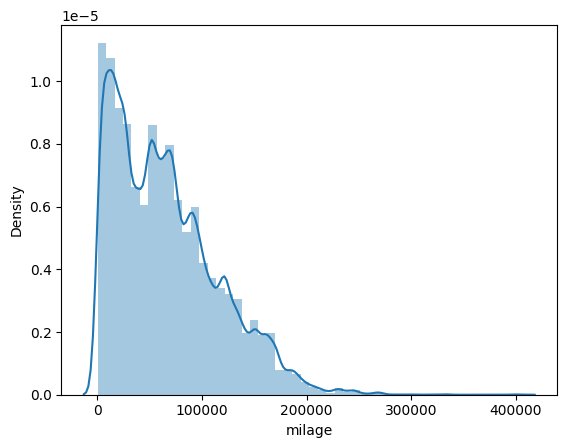

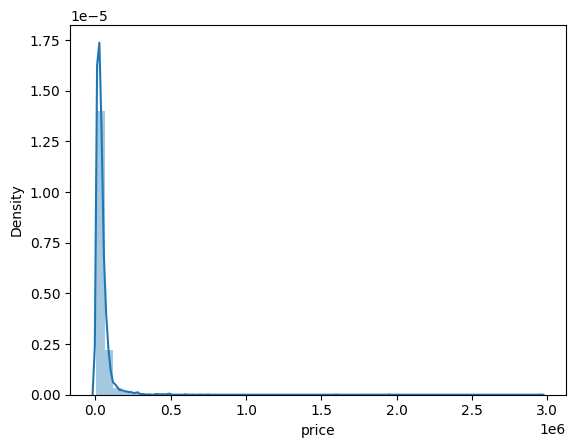

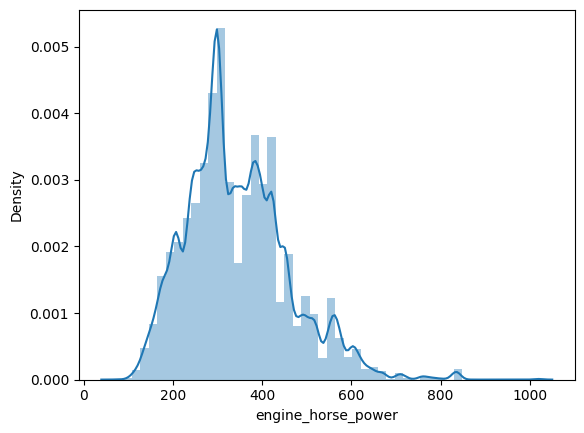

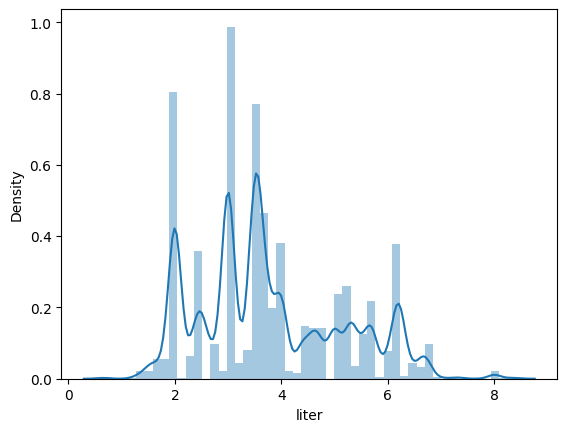

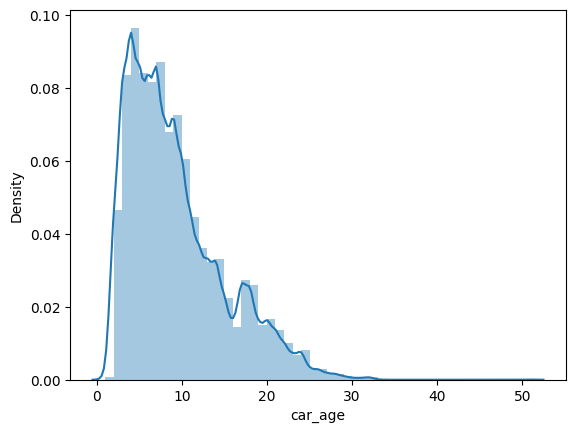

In [90]:
for i in train_df.select_dtypes(include='number').columns.tolist():
    sns.distplot(train_df[i])
    plt.show()

In [91]:
trainfinal=train_df.drop(['id'], axis=1)
testfinal=test_df.drop(['id'], axis=1)

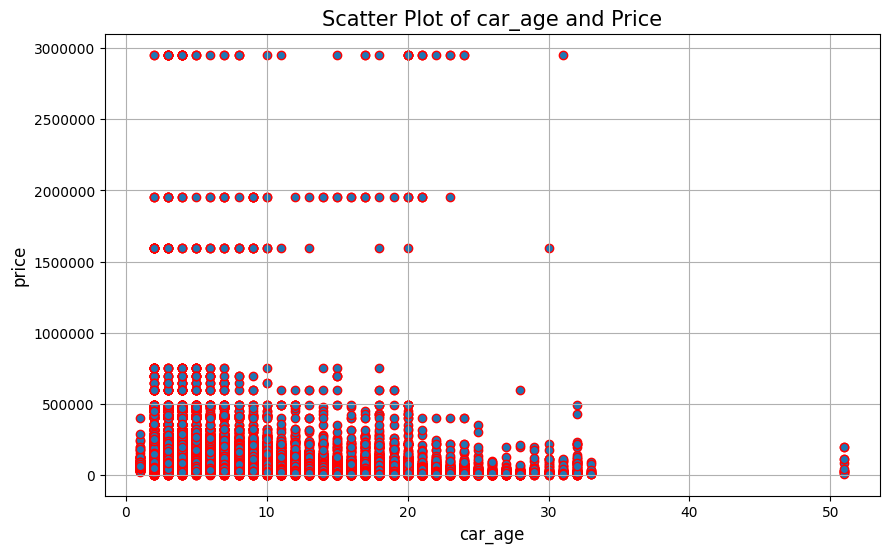

Z-Score of car_age
 
        Top 5 Z-Scores  Bottom 5 Z-Scores
47488              NaN           7.389216
51122         -1.44322                NaN
55169              NaN           7.389216
60702              NaN           7.389216
84074         -1.44322                NaN
104715        -1.44322                NaN
127656             NaN           7.389216
133985             NaN           7.389216
155055        -1.44322                NaN
156792        -1.44322                NaN


In [92]:
scatter_plot('car_age', trainfinal)

In [93]:
trainfinal.query('car_age>40 or price>200000').shape

(3244, 12)

In [94]:
trainfinal = trainfinal[~((trainfinal['car_age'] > 40) | (trainfinal['price'] > 200000))]

In [95]:
print(trainfinal.shape)
print(testfinal.shape)

(185289, 12)
(125690, 11)


In [96]:
trainfinal.describe()

,milage,price,engine_horse_power,liter,car_age
count,185289.000000,185289.000000,185289.000000,185289.000000,185289.000000
mean,66506.048907,37593.177409,342.712293,3.771408,9.228211
std,49751.334486,29662.149482,114.063492,1.368280,5.652504
min,100.000000,2000.000000,70.000000,0.650000,1.000000
25%,25000.000000,16900.000000,265.000000,3.000000,5.000000
50%,58880.000000,30000.000000,325.000000,3.500000,8.000000
75%,96000.000000,48000.000000,412.000000,4.700000,12.000000
max,405000.000000,200000.000000,1020.000000,8.400000,33.000000


In [97]:
trainfinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185289 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               185289 non-null  object 
 1   model               185289 non-null  object 
 2   milage              185289 non-null  int64  
 3   fuel_type           185289 non-null  object 
 4   accident            185289 non-null  object 
 5   clean_title         185289 non-null  object 
 6   price               185289 non-null  int64  
 7   engine_horse_power  185289 non-null  float64
 8   cylinder_type       185289 non-null  object 
 9   liter               185289 non-null  float64
 10  gear_type           185289 non-null  object 
 11  car_age             185289 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 18.4+ MB


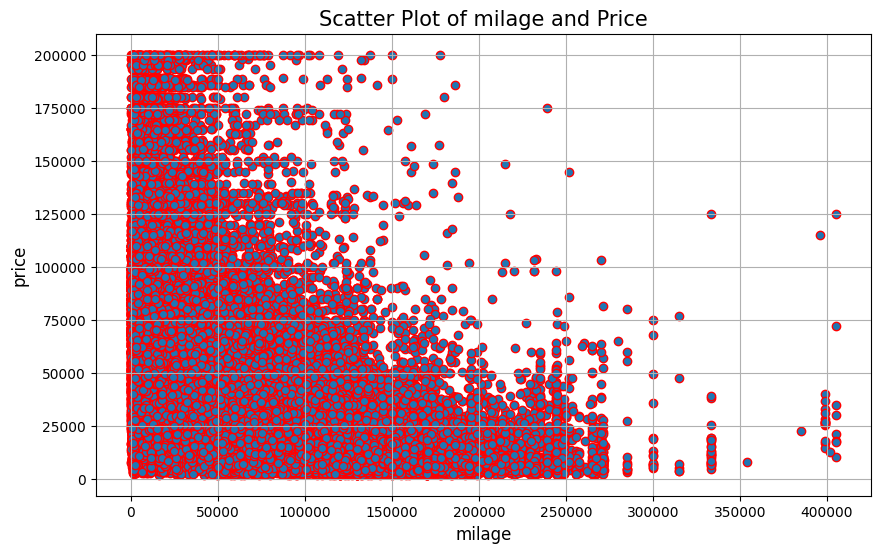

Z-Score of milage
 
        Top 5 Z-Scores  Bottom 5 Z-Scores
13505        -1.334763                NaN
36080              NaN           6.803734
36083        -1.334763                NaN
45077              NaN           6.803734
45288              NaN           6.803734
61730              NaN           6.803734
90373        -1.334763                NaN
126917             NaN           6.803734
155003       -1.334763                NaN
165399       -1.334763                NaN


In [98]:
scatter_plot('milage', trainfinal)

In [99]:
trainfinal.query('milage>250000').shape

(315, 12)

In [100]:
trainfinal = trainfinal[trainfinal['milage'] <= 250000]

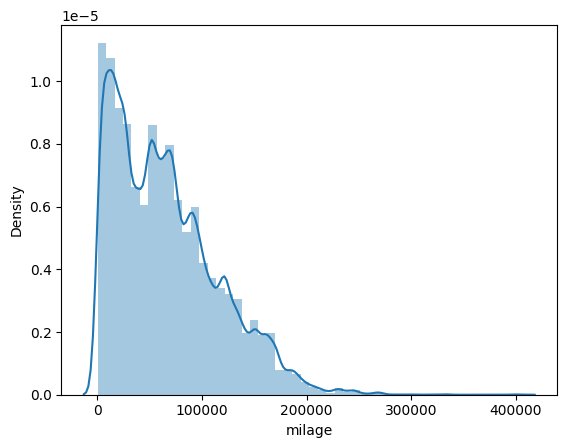

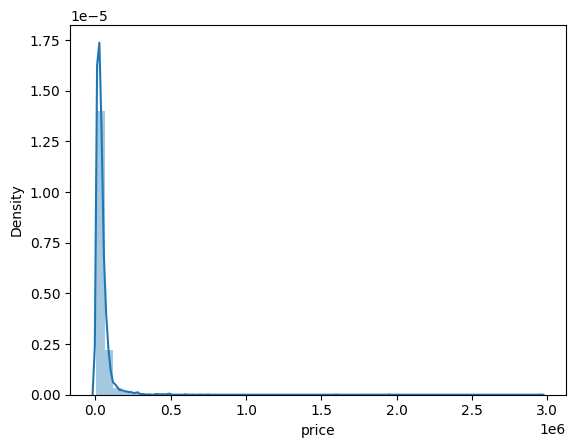

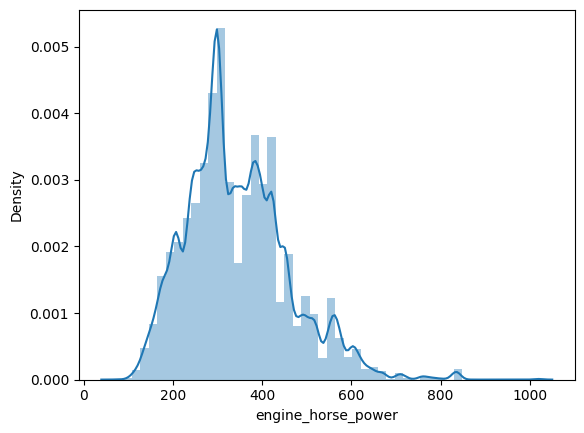

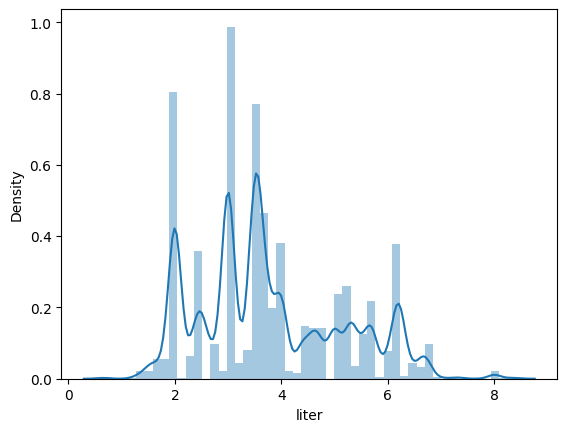

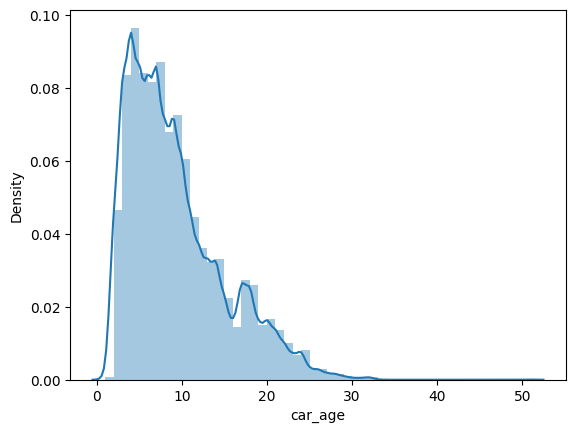

In [101]:
for i in trainfinal.select_dtypes(include='number').columns.tolist():
    sns.distplot(train_df[i])
    plt.show()

In [102]:
trainfinal.describe()

,milage,price,engine_horse_power,liter,car_age
count,184974.000000,184974.000000,184974.000000,184974.000000,184974.000000
mean,66134.123704,37625.860667,342.802378,3.770103,9.213814
std,48941.653085,29663.761887,114.080848,1.367803,5.640989
min,100.000000,2000.000000,70.000000,0.650000,1.000000
25%,25000.000000,16995.000000,265.000000,3.000000,5.000000
50%,58800.000000,30000.000000,326.000000,3.500000,8.000000
75%,95798.000000,48000.000000,412.000000,4.700000,12.000000
max,250000.000000,200000.000000,1020.000000,8.400000,33.000000


In [103]:
trainfinal.query('price>150000').shape

(1936, 12)

## Find out Outlier of Column Price

In [104]:
trainfinal.head(3)

,brand,model,milage,fuel_type,accident,clean_title,price,engine_horse_power,cylinder_type,liter,gear_type,car_age
0,MINI,Cooper S Base,213000,Gasoline,None reported,Yes,4200,172.0,4,1.6,Automatic,18
1,Lincoln,LS V8,143250,Gasoline,At least 1 accident or damage reported,Yes,4999,252.0,8,3.9,Automatic,23
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,None reported,Yes,13900,320.0,8,5.3,Automatic,23


### 1. Using the Interquartile Range (IQR) Method

In [105]:
# Assuming df is your dataframe and 'price' is the column you're analyzing
Q1 = trainfinal['price'].quantile(0.25)
Q3 = trainfinal['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_IQR = trainfinal[(trainfinal['price'] < lower_bound) | (trainfinal['price'] > upper_bound)]

# Print the outliers
print(outliers_IQR.shape)

(9051, 12)


### 2. Using Z-Scores

In [106]:
# Calculate Z-scores for 'price' column
trainfinal['z_score'] = stats.zscore(trainfinal['price'])

# Identify outliers based on Z-score threshold
outliers_z = trainfinal[trainfinal['z_score'].abs() > 3]

# Print the outliers
print(outliers_z.shape)

(4159, 13)


### 3. Using Tukey's Fences

In [107]:
# Tukey's fences with k = 3 for extreme outliers
k = 3
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Identify extreme outliers
extreme_outliers = trainfinal[(trainfinal['price'] < lower_bound) | (trainfinal['price'] > upper_bound)]

# Print the extreme outliers
print(extreme_outliers.shape)

(2756, 13)


### 4. Visualization with Boxplots

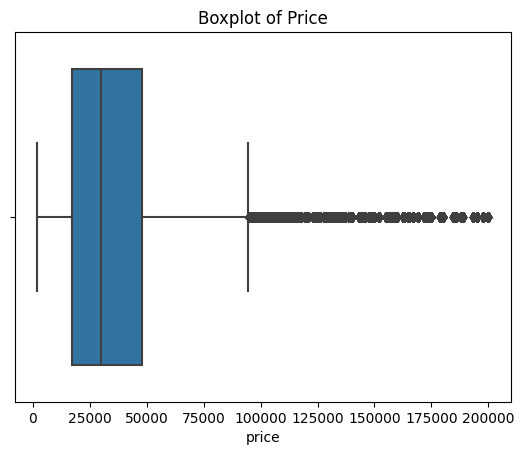

In [108]:
# Boxplot to visualize outliers
sns.boxplot(x=trainfinal['price'])
plt.title("Boxplot of Price")
plt.show()

#### Which Method to Choose?
If your data is normally distributed, Z-scores are a good method.
For skewed data, the IQR method is more appropriate.
Visualization can help you decide visually which values seem to be outliers

Price data is right-skewed, using the IQR method would be a more appropriate choice for detecting outliers, as it's robust to skewness. However, you might also want to consider transforming the data to reduce skewness before applying any outlier detection method.

### 1. Log Transformation
A log transformation can help reduce right skewness. You can apply it to the price column and then detect outliers using IQR or Z-scores on the transformed data

In [109]:
# Log transform the 'price' column to reduce skewness
trainfinal['price_log'] = np.log1p(trainfinal['price'])  # Use log1p to avoid log(0) issues

# Now, apply the IQR method to the transformed data
Q1 = trainfinal['price_log'].quantile(0.25)
Q3 = trainfinal['price_log'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the transformed data
outliers_IQRlog = trainfinal[(trainfinal['price_log'] < lower_bound) | (trainfinal['price_log'] > upper_bound)]

# Print the outliers
print(outliers_IQRlog.shape)

(1020, 14)


### 2. Square Root Transformation:

In [110]:
trainfinal['price_sqrt'] = np.sqrt(trainfinal['price'])

# Now, apply the IQR method to the transformed data
Q1 = trainfinal['price_sqrt'].quantile(0.25)
Q3 = trainfinal['price_sqrt'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the transformed data
outliers_sqrt = trainfinal[(trainfinal['price_sqrt'] < lower_bound) | (trainfinal['price_sqrt'] > upper_bound)]

# Print the outliers
print(outliers_sqrt.shape)

(4390, 15)


### Box-Cox Transformation:

In [111]:
trainfinal['price_boxcox'], lmbda = stats.boxcox(trainfinal['price'])

# Now, apply the IQR method to the transformed data
Q1 = trainfinal['price_boxcox'].quantile(0.25)
Q3 = trainfinal['price_boxcox'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the transformed data
outliers_boxcox = trainfinal[(trainfinal['price_boxcox'] < lower_bound) | (trainfinal['price_boxcox'] > upper_bound)]

# Print the outliers
print(outliers_boxcox.shape)

(971, 16)


# Now Final 

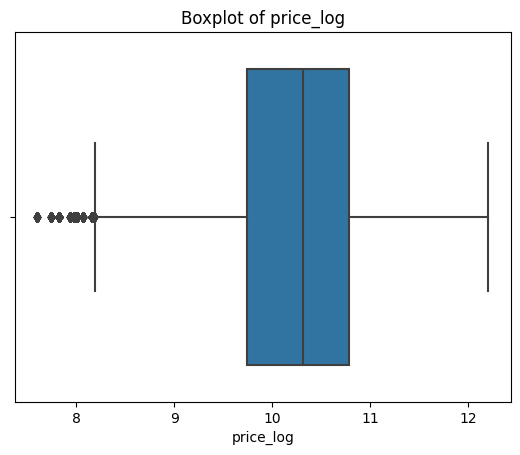

In [112]:
# Boxplot to visualize outliers
sns.boxplot(x=trainfinal['price_log'])
plt.title("Boxplot of price_log")
plt.show()

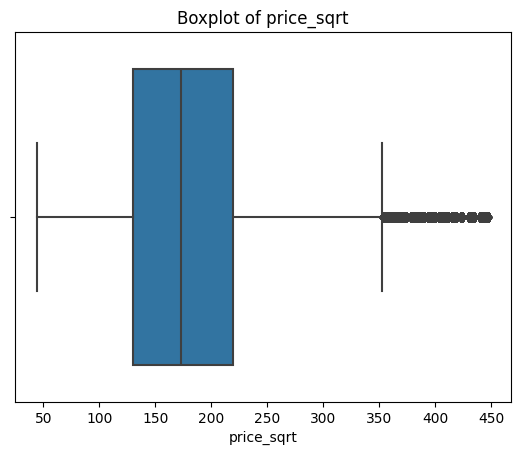

In [113]:
# Boxplot to visualize outliers
sns.boxplot(x=trainfinal['price_sqrt'])
plt.title("Boxplot of price_sqrt")
plt.show()

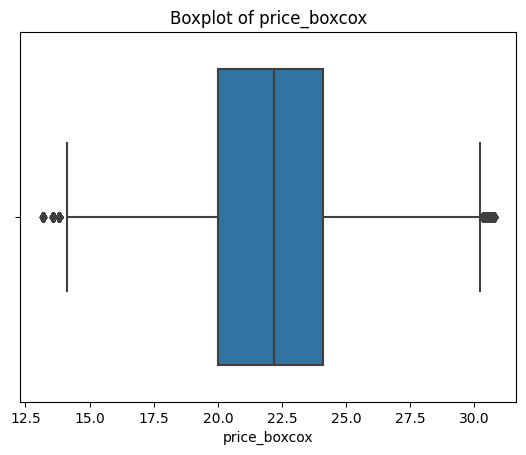

In [114]:
# Boxplot to visualize outliers
sns.boxplot(x=trainfinal['price_boxcox'])
plt.title("Boxplot of price_boxcox")
plt.show()

<Axes: xlabel='price_boxcox', ylabel='Density'>

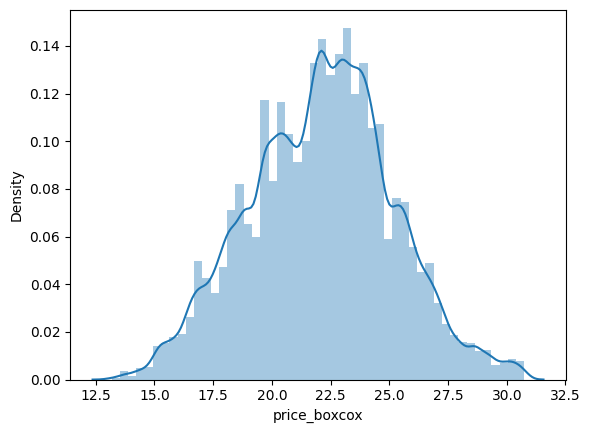

In [115]:
sns.distplot(trainfinal['price_boxcox'])

In [116]:
trainfinal['price_boxcox'], _ = stats.boxcox(trainfinal['price'])

# Now, apply the IQR method to the transformed data
Q1 = trainfinal['price_boxcox'].quantile(0.25)
Q3 = trainfinal['price_boxcox'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the transformed data
outliers_boxcox = trainfinal[(trainfinal['price_boxcox'] < lower_bound) | (trainfinal['price_boxcox'] > upper_bound)]



# drop the outliers from the dataframe
trainfinal_v = trainfinal[~((trainfinal['price_boxcox'] < lower_bound) | (trainfinal['price_boxcox'] > upper_bound))]

<Axes: xlabel='price_boxcox', ylabel='Density'>

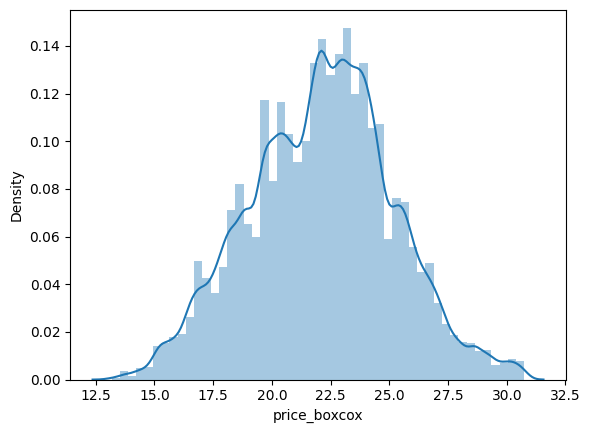

In [117]:
sns.distplot(trainfinal['price_boxcox'])

In [118]:
trainfinal_v.head(3)

,brand,model,milage,fuel_type,accident,clean_title,price,engine_horse_power,cylinder_type,liter,gear_type,car_age,z_score,price_log,price_sqrt,price_boxcox
0,MINI,Cooper S Base,213000,Gasoline,None reported,Yes,4200,172.0,4,1.6,Automatic,18,-1.126828,8.343078,64.807407,15.333621
1,Lincoln,LS V8,143250,Gasoline,At least 1 accident or damage reported,Yes,4999,252.0,8,3.9,Automatic,23,-1.099892,8.517193,70.703607,15.870822
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,None reported,Yes,13900,320.0,8,5.3,Automatic,23,-0.799829,9.539716,117.898261,19.290512


### Assuming 'lmbda' is the lambda value you used for the Box-Cox transformation
#### trainfinal_v['price_boxcox'] = inv_boxcox(trainfinal_v['price_boxcox'], lmbda)

In [119]:
# column drop 'price','z_score', 'price_log', 'price_sqrt'
trainfinal_v = trainfinal_v.drop(['price','z_score', 'price_log', 'price_sqrt'], axis=1)

In [120]:
trainfinal_v.head(3)

,brand,model,milage,fuel_type,accident,clean_title,engine_horse_power,cylinder_type,liter,gear_type,car_age,price_boxcox
0,MINI,Cooper S Base,213000,Gasoline,None reported,Yes,172.0,4,1.6,Automatic,18,15.333621
1,Lincoln,LS V8,143250,Gasoline,At least 1 accident or damage reported,Yes,252.0,8,3.9,Automatic,23,15.870822
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,None reported,Yes,320.0,8,5.3,Automatic,23,19.290512


In [121]:
null_and_percent(trainfinal_v)

,Count,Percentage (%)
brand,0,0.0
model,0,0.0
milage,0,0.0
fuel_type,0,0.0
accident,0,0.0
clean_title,0,0.0
engine_horse_power,0,0.0
cylinder_type,0,0.0
liter,0,0.0
gear_type,0,0.0


In [122]:
import category_encoders as ce

# Train dataset এ Target Encoding ব্যবহার করা হচ্ছে
target_encoder = ce.TargetEncoder(cols=['brand', 'model'])
trainfinal_v[['brand', 'model']] = target_encoder.fit_transform(trainfinal_v[['brand', 'model']], trainfinal_v['price_boxcox'])

# Test dataset এ শুধু transform() করা হচ্ছে, কিন্তু টার্গেট কলাম ব্যবহার করা হচ্ছে না
testfinal[['brand', 'model']] = target_encoder.transform(testfinal[['brand', 'model']])

In [123]:
print(trainfinal_v.shape)
print(testfinal.shape)

(184003, 12)
(125690, 11)


In [124]:
trainfinal_v['accident'].value_counts()

accident
None reported                             142873
At least 1 accident or damage reported     41130
Name: count, dtype: int64

In [125]:
trainfinal_v['gear_type'].value_counts()

gear_type
Automatic    166551
Manual        17452
Name: count, dtype: int64

In [126]:
trainfinal_v['clean_title'].value_counts()

clean_title
Yes    163653
No      20350
Name: count, dtype: int64

In [127]:
# accident column
trainfinal_v['accident'] = trainfinal_v['accident'].replace({
    'None reported': 0,
    'At least 1 accident or damage reported': 1
})
testfinal['accident'] = testfinal['accident'].replace({
    'None reported': 0,
    'At least 1 accident or damage reported': 1
})

# gear_type column
trainfinal_v['gear_type'] = trainfinal_v['gear_type'].replace({
    'Automatic': 0,
    'Manual': 1
})
testfinal['gear_type'] = testfinal['gear_type'].replace({
    'Automatic': 0,
    'Manual': 1
})


# clean_title column
trainfinal_v['clean_title'] = trainfinal_v['clean_title'].replace({
    'Yes': 0,
    'No': 1
})
testfinal['clean_title'] = testfinal['clean_title'].replace({
    'Yes': 0,
    'No': 1
})

In [128]:
trainfinal_v.head(3)

,brand,model,milage,fuel_type,accident,clean_title,engine_horse_power,cylinder_type,liter,gear_type,car_age,price_boxcox
0,19.259855,18.476795,213000,Gasoline,0,0,172.0,4,1.6,0,18,15.333621
1,21.209577,19.525003,143250,Gasoline,1,0,252.0,8,3.9,0,23,15.870822
2,22.117179,20.683292,136731,E85 Flex Fuel,0,0,320.0,8,5.3,0,23,19.290512


In [129]:
null_and_percent(trainfinal_v)

,Count,Percentage (%)
brand,0,0.0
model,0,0.0
milage,0,0.0
fuel_type,0,0.0
accident,0,0.0
clean_title,0,0.0
engine_horse_power,0,0.0
cylinder_type,0,0.0
liter,0,0.0
gear_type,0,0.0


In [130]:
trainfinal_v.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184003 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               184003 non-null  float64
 1   model               184003 non-null  float64
 2   milage              184003 non-null  int64  
 3   fuel_type           184003 non-null  object 
 4   accident            184003 non-null  int64  
 5   clean_title         184003 non-null  int64  
 6   engine_horse_power  184003 non-null  float64
 7   cylinder_type       184003 non-null  object 
 8   liter               184003 non-null  float64
 9   gear_type           184003 non-null  int64  
 10  car_age             184003 non-null  int64  
 11  price_boxcox        184003 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 18.2+ MB


In [131]:
# Specify the columns for transformations
categorical_features = ['fuel_type', 'cylinder_type']
numerical_features_to_scale = ['brand', 'model', 'milage', 'engine_horse_power', 'liter', 'car_age']
binary_features = ['accident','clean_title', 'gear_type']  # Columns with binary values (0 and 1)

# Create the Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), numerical_features_to_scale),
        # Pass-through binary features without scaling
        ('binary', 'passthrough', binary_features)
    ],
    remainder='drop'  # Drop other columns except the target
)

In [132]:
# Fit and transform the training data
X_trainfinal = preprocessor.fit_transform(trainfinal_v.drop(columns=['price_boxcox']))  # 'price' কলাম বাদ দিয়ে fit এবং transform করা হচ্ছে
y_trainfinal = trainfinal_v['price_boxcox']  # টার্গেট কলাম আলাদা করা

# Only transform the test data, no fitting
X_testfinal = preprocessor.transform(testfinal)

In [133]:
print(X_trainfinal.shape)
print(y_trainfinal .shape)
print(X_testfinal.shape)

(184003, 27)
(184003,)
(125690, 27)


In [134]:
# Get the column names for the transformed categorical features
categorical_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features).tolist()

# Combine categorical columns with numerical and binary feature names
train_columns = categorical_columns + numerical_features_to_scale + binary_features

# Convert the transformed data back to a DataFrame
train_transformed_df = pd.DataFrame(X_trainfinal, columns=train_columns)

# Check the resulting DataFrame
train_transformed_df.head()

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Electric,fuel_type_Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,cylinder_type_10,cylinder_type_12,...,cylinder_type_V8,brand,model,milage,engine_horse_power,liter,car_age,accident,clean_title,gear_type
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.751798,-1.865888,3.006621,-1.498608,-1.584919,1.562301,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.865988,-1.330013,1.578289,-0.795391,0.096574,2.450933,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.011863,-0.737863,1.444793,-0.197656,1.120091,2.450933,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.067903,0.611157,-0.955849,0.681366,0.900766,-0.214963,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.680457,0.839546,-1.203877,-1.182160,-1.292485,-0.925869,0.0,0.0,0.0


In [135]:
# Get the column names for the transformed categorical features
categorical_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features).tolist()

# Combine categorical columns with numerical and binary feature names
test_columns = categorical_columns + numerical_features_to_scale + binary_features

# Convert the transformed data back to a DataFrame
test_transformed_df = pd.DataFrame(X_testfinal, columns=test_columns)

# Check the resulting DataFra
test_transformed_df.head()

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Electric,fuel_type_Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,cylinder_type_10,cylinder_type_12,...,cylinder_type_V8,brand,model,milage,engine_horse_power,liter,car_age,accident,clean_title,gear_type
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.895995,-1.156160,0.651665,-0.900873,-1.292485,0.140489,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.895995,1.568781,-1.167958,0.461611,-0.561402,-0.748143,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.038199,0.761218,-0.779309,0.857170,-0.195860,-1.103596,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.047161,-0.205136,-0.100733,-0.795391,-1.292485,-0.037237,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.047161,-0.476964,-0.146972,-0.795391,-1.292485,-0.392690,0.0,0.0,0.0


In [136]:
X=train_transformed_df
y=y_trainfinal

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
import optuna
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    
    
    # Choose the model
    model_name = trial.suggest_categorical("model", ["lightgbm", "xgboost", "catboost"])
    
    if model_name == "lightgbm":
        # Define LightGBM hyperparameters
        param = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': 'rmse',
            'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
            'num_leaves': trial.suggest_int('num_leaves', 20, 150),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
            'random_state': 42
        }
        
        # Train LightGBM model
        dtrain = lgb.Dataset(X_train, label=y_train)
        dvalid = lgb.Dataset(X_test, label=y_test)
        model = lgb.train(param, dtrain, valid_sets=[dvalid])  # Adjust as needed
    
    elif model_name == "xgboost":
        # Define XGBoost hyperparameters
        param = {
            'booster': 'gbtree',
            'objective': 'reg:squarederror',
            'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 10.0),
            'subsample': trial.suggest_float('subsample', 0.4, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
            'gamma': trial.suggest_float('gamma', 1e-8, 10.0),
            'lambda': trial.suggest_float('lambda', 1e-8, 10.0),
            'alpha': trial.suggest_float('alpha', 1e-8, 10.0),
            'n_estimators': 1000,
            'random_state': 42
        }
        
        # Train XGBoost model
        model = xgb.XGBRegressor(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)],  verbose=False)
    
    elif model_name == "catboost":
        # Define CatBoost hyperparameters
        param = {
            'iterations': 1000,
            'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
            'depth': trial.suggest_int('depth', 3, 15),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0),
            'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
            'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0),
            'random_state': 42,
            'verbose': 0
        }
        
        # Train CatBoost model
        model = CatBoostRegressor(**param)
        model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)
    
    # Predict on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse

# Create the study object
study = optuna.create_study(direction="minimize")

# Optimize hyperparameters
study.optimize(objective, n_trials=100)

# Print the best parameters found
print("Best trial:")
trial = study.best_trial

print(f"  Value (RMSE): {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-09-29 17:00:01,611] A new study created in memory with name: no-name-92102f0f-a318-464b-a176-b319ec97172e
[I 2024-09-29 17:00:32,773] Trial 0 finished with value: 1.6913976173006822 and parameters: {'model': 'xgboost', 'learning_rate': 0.0552514686390626, 'max_depth': 14, 'min_child_weight': 7.286504727136038, 'subsample': 0.5105985328484651, 'colsample_bytree': 0.810277156086467, 'gamma': 3.5275533955241514, 'lambda': 5.1243318544606025, 'alpha': 4.055591240512156}. Best is trial 0 with value: 1.6913976173006822.
[I 2024-09-29 17:00:48,734] Trial 1 finished with value: 1.671287462868855 and parameters: {'model': 'catboost', 'learning_rate': 0.06606100810326503, 'depth': 6, 'l2_leaf_reg': 2.4997378486108306, 'bagging_temperature': 0.6446559256857866, 'random_strength': 8.357206282421059}. Best is trial 1 with value: 1.671287462868855.
[I 2024-09-29 17:01:08,366] Trial 2 finished with value: 1.670590981035958 and parameters: {'model': 'xgboost', 'learning_rate': 0.05474457460871

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-09-29 17:02:00,412] Trial 5 finished with value: 1.9836252434223596 and parameters: {'model': 'lightgbm', 'learning_rate': 0.011567917744226096, 'num_leaves': 90, 'max_depth': 10, 'min_data_in_leaf': 38, 'lambda_l1': 4.032488444022832, 'lambda_l2': 6.213722933275812, 'feature_fraction': 0.45071330222651085, 'bagging_fraction': 0.9601263289491564, 'bagging_freq': 6}. Best is trial 3 with value: 1.6660641745519524.
[I 2024-09-29 17:03:26,352] Trial 6 finished with value: 1.709535865314525 and parameters: {'model': 'catboost', 'learning_rate': 0.0035922924380004328, 'depth': 12, 'l2_leaf_reg': 8.951068815164193, 'bagging_temperature': 0.4770186631945421, 'random_strength': 7.4318095125508306}. Best is trial 3 with value: 1.6660641745519524.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721


[I 2024-09-29 17:03:27,969] Trial 7 finished with value: 2.0445243445676193 and parameters: {'model': 'lightgbm', 'learning_rate': 0.008637206050211954, 'num_leaves': 54, 'max_depth': 8, 'min_data_in_leaf': 99, 'lambda_l1': 2.339551607308842, 'lambda_l2': 3.223736723217261, 'feature_fraction': 0.7769536164729257, 'bagging_fraction': 0.861841140708926, 'bagging_freq': 4}. Best is trial 3 with value: 1.6660641745519524.
[I 2024-09-29 17:03:52,442] Trial 8 finished with value: 1.66337721832123 and parameters: {'model': 'xgboost', 'learning_rate': 0.03815267174067887, 'max_depth': 12, 'min_child_weight': 3.2998647989783723, 'subsample': 0.704289824133554, 'colsample_bytree': 0.46649320024997676, 'gamma': 3.074126823983082, 'lambda': 9.54964572014399, 'alpha': 9.838624379050174}. Best is trial 8 with value: 1.66337721832123.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721


[I 2024-09-29 17:03:54,294] Trial 9 finished with value: 1.6719496748661251 and parameters: {'model': 'lightgbm', 'learning_rate': 0.08169173370524478, 'num_leaves': 108, 'max_depth': 10, 'min_data_in_leaf': 10, 'lambda_l1': 9.069612986013034, 'lambda_l2': 1.079330687761743, 'feature_fraction': 0.8110500165127381, 'bagging_fraction': 0.5774901394460386, 'bagging_freq': 3}. Best is trial 8 with value: 1.66337721832123.
[I 2024-09-29 17:04:15,401] Trial 10 finished with value: 1.6862194928755654 and parameters: {'model': 'xgboost', 'learning_rate': 0.03105563171528128, 'max_depth': 3, 'min_child_weight': 5.123069833732298, 'subsample': 0.8101430985494128, 'colsample_bytree': 0.41969146625026166, 'gamma': 0.2698150234091097, 'lambda': 9.96473701396221, 'alpha': 9.638211817163025}. Best is trial 8 with value: 1.66337721832123.
[I 2024-09-29 17:04:39,510] Trial 11 finished with value: 1.6636250434593363 and parameters: {'model': 'xgboost', 'learning_rate': 0.037024991792299844, 'max_depth':

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-09-29 17:11:40,340] Trial 18 finished with value: 1.794282513907937 and parameters: {'model': 'lightgbm', 'learning_rate': 0.02217677402338168, 'num_leaves': 25, 'max_depth': 12, 'min_data_in_leaf': 98, 'lambda_l1': 9.608945736145525, 'lambda_l2': 9.760568080860597, 'feature_fraction': 0.41361703117659754, 'bagging_fraction': 0.4028601811423401, 'bagging_freq': 1}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:11:50,769] Trial 19 finished with value: 1.6896405693474443 and parameters: {'model': 'catboost', 'learning_rate': 0.04450500187268969, 'depth': 3, 'l2_leaf_reg': 9.73623674072736, 'bagging_temperature': 0.9614883511186559, 'random_strength': 2.0981548357810307}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:12:14,679] Trial 20 finished with value: 1.6655529942751568 and parameters: {'model': 'xgboost', 'learning_rate': 0.03099680296938261, 'max_depth': 7, 'min_child_weight': 6.43497848532902, 'subsample': 0.7299580821851781, 'colsa

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-09-29 17:16:06,197] Trial 29 finished with value: 1.6746036590963902 and parameters: {'model': 'lightgbm', 'learning_rate': 0.04936967784747928, 'num_leaves': 150, 'max_depth': 11, 'min_data_in_leaf': 63, 'lambda_l1': 0.3579300717936107, 'lambda_l2': 9.072418974886173, 'feature_fraction': 0.9713083508477449, 'bagging_fraction': 0.6766184931759791, 'bagging_freq': 7}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:16:36,114] Trial 30 finished with value: 1.666660492315074 and parameters: {'model': 'xgboost', 'learning_rate': 0.039238914680809346, 'max_depth': 14, 'min_child_weight': 5.425329258645864, 'subsample': 0.6736749363008849, 'colsample_bytree': 0.5517986903644143, 'gamma': 4.636866644720416, 'lambda': 7.098783413404516, 'alpha': 1.1017173270966811}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:17:01,410] Trial 31 finished with value: 1.664953391318458 and parameters: {'model': 'xgboost', 'learning_rate': 0.037927840584895074, 'max

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-09-29 17:20:13,715] Trial 39 finished with value: 1.7720700970798482 and parameters: {'model': 'lightgbm', 'learning_rate': 0.018003359414161528, 'num_leaves': 146, 'max_depth': 9, 'min_data_in_leaf': 65, 'lambda_l1': 6.67078808578722, 'lambda_l2': 0.08441396148669167, 'feature_fraction': 0.60440874458748, 'bagging_fraction': 0.45551739955585036, 'bagging_freq': 1}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:20:53,268] Trial 40 finished with value: 1.6757934301345534 and parameters: {'model': 'xgboost', 'learning_rate': 0.03264623435430164, 'max_depth': 11, 'min_child_weight': 7.351851377418518, 'subsample': 0.6875170485665366, 'colsample_bytree': 0.5737445293821385, 'gamma': 1.8633659372007196, 'lambda': 5.604031950166913, 'alpha': 0.9439481309032443}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:21:20,073] Trial 41 finished with value: 1.6636695757965347 and parameters: {'model': 'xgboost', 'learning_rate': 0.04010010746641208, 'max

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721


[I 2024-09-29 17:24:29,624] Trial 48 finished with value: 2.9593805013374714 and parameters: {'model': 'lightgbm', 'learning_rate': 0.000269357793025643, 'num_leaves': 22, 'max_depth': 12, 'min_data_in_leaf': 14, 'lambda_l1': 6.207138173109264, 'lambda_l2': 6.249636750362258, 'feature_fraction': 0.9945466089364542, 'bagging_fraction': 0.801323677504137, 'bagging_freq': 5}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:24:54,329] Trial 49 finished with value: 1.677490952919495 and parameters: {'model': 'xgboost', 'learning_rate': 0.05681240210359021, 'max_depth': 5, 'min_child_weight': 1.3874944433243561, 'subsample': 0.9590407294222874, 'colsample_bytree': 0.6069848255705627, 'gamma': 9.703659815594968, 'lambda': 2.6952624200752955, 'alpha': 4.220993472648113}. Best is trial 12 with value: 1.6632207032051909.
[I 2024-09-29 17:25:26,558] Trial 50 finished with value: 1.713503695839808 and parameters: {'model': 'xgboost', 'learning_rate': 0.09980929724277304, 'max_dep

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-09-29 17:29:28,333] Trial 59 finished with value: 1.7237119952347908 and parameters: {'model': 'lightgbm', 'learning_rate': 0.022607312471303178, 'num_leaves': 116, 'max_depth': 14, 'min_data_in_leaf': 44, 'lambda_l1': 0.08441520844392603, 'lambda_l2': 3.562633717448191, 'feature_fraction': 0.6026128169598199, 'bagging_fraction': 0.6011129233664344, 'bagging_freq': 3}. Best is trial 55 with value: 1.6619160719900796.
[I 2024-09-29 17:38:30,751] Trial 60 finished with value: 1.6751123836905402 and parameters: {'model': 'catboost', 'learning_rate': 0.014418537447866756, 'depth': 15, 'l2_leaf_reg': 2.7632534946595024, 'bagging_temperature': 0.2796120687917226, 'random_strength': 4.742331149979125}. Best is trial 55 with value: 1.6619160719900796.
[I 2024-09-29 17:38:57,225] Trial 61 finished with value: 1.662998681389613 and parameters: {'model': 'xgboost', 'learning_rate': 0.01993229491128822, 'max_depth': 14, 'min_child_weight': 9.0834207361585, 'subsample': 0.7395985785489388, 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721


[I 2024-09-29 17:46:58,488] Trial 78 finished with value: 1.710206108091511 and parameters: {'model': 'lightgbm', 'learning_rate': 0.025123498307593358, 'num_leaves': 63, 'max_depth': 14, 'min_data_in_leaf': 80, 'lambda_l1': 3.8874292778648023, 'lambda_l2': 7.95703618901921, 'feature_fraction': 0.8762556831108173, 'bagging_fraction': 0.7851195830440978, 'bagging_freq': 7}. Best is trial 55 with value: 1.6619160719900796.
[I 2024-09-29 17:47:25,915] Trial 79 finished with value: 1.6623876221042806 and parameters: {'model': 'xgboost', 'learning_rate': 0.015852231632166414, 'max_depth': 9, 'min_child_weight': 9.894860770973903, 'subsample': 0.8523147778815734, 'colsample_bytree': 0.4199680201037983, 'gamma': 2.630563679644088, 'lambda': 3.1676648941025656, 'alpha': 7.2485556108690306}. Best is trial 55 with value: 1.6619160719900796.
[I 2024-09-29 17:47:52,868] Trial 80 finished with value: 1.6638366342701403 and parameters: {'model': 'xgboost', 'learning_rate': 0.01653313669320348, 'max_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 128802, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.104721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-09-29 17:54:17,489] Trial 97 finished with value: 1.709081444350913 and parameters: {'model': 'lightgbm', 'learning_rate': 0.02703882259755597, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 30, 'lambda_l1': 7.647761353934287, 'lambda_l2': 2.4932988878633933, 'feature_fraction': 0.6591245388993259, 'bagging_fraction': 0.9348388126977062, 'bagging_freq': 2}. Best is trial 83 with value: 1.6616590356060303.
[I 2024-09-29 17:54:50,497] Trial 98 finished with value: 1.6670596260323918 and parameters: {'model': 'xgboost', 'learning_rate': 0.006134382053011936, 'max_depth': 10, 'min_child_weight': 9.094377250648979, 'subsample': 0.9867881917056388, 'colsample_bytree': 0.7909994139613116, 'gamma': 3.7889337361839304, 'lambda': 6.171041393589781, 'alpha': 7.953581750425029}. Best is trial 83 with value: 1.6616590356060303.
[I 2024-09-29 17:55:27,806] Trial 99 finished with value: 2.085635299888308 and parameters: {'model': 'xgboost', 'learning_rate': 0.0008493549142475562, 'max

Best trial:
  Value (RMSE): 1.6616590356060303
  Params: 
    model: xgboost
    learning_rate: 0.015035923654491301
    max_depth: 12
    min_child_weight: 7.858361181502909
    subsample: 0.86063580322767
    colsample_bytree: 0.47628683202867483
    gamma: 4.228983573833714
    lambda: 3.1207660328596925
    alpha: 6.006924957915704


In [138]:
best_model_name = study.best_trial.params['model']

if best_model_name == 'lightgbm':
    best_model = lgb.LGBMRegressor(**study.best_trial.params)
elif best_model_name == 'xgboost':
    best_model = xgb.XGBRegressor(**study.best_trial.params)
else:
    best_model = cb.CatBoostRegressor(**study.best_trial.params)

# Fit the best model on the full dataset
best_model.fit(X, y)

XGBRegressor(alpha=6.006924957915704, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.47628683202867483, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=4.228983573833714,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=3.1207660328596925,
             learning_rate=0.015035923654491301, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=7.858361181502909, missing=nan, model='xgboost',
             monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)

In [139]:
y_test_pred = best_model.predict(test_transformed_df)

In [140]:
from scipy.special import inv_boxcox

# যেই lambda_value ট্রান্সফরমেশনের সময় পেয়েছিলেন সেটা ব্যবহার করুন
y_test_pred_original = inv_boxcox(y_test_pred, lmbda)

# প্রথম ৫টি প্রেডিকশন চেক করতে পারেন
print(y_test_pred_original[:5])

[18979.744 53142.367 46042.02  26415.965 28160.018]


In [141]:
submission = pd.DataFrame({
        "id": test["id"],
        "price": y_test_pred_original.astype('int')
    })

submission.to_csv('submission_29_Optuna.csv', index=False)